In [1]:
import numpy as np
from scipy import stats
import math
import statistics as st
import os
import sys

# ***Problem Statement 1:***
- The marks awarded for an assignment set for a Year 8 class of 20 students were as follows:
     - `6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8`
- **Calculate the mean, median, mode and standard deviation.**

#### **`Solution :- `**

In [2]:
marks = np.asarray([ 6, 7, 5, 7, 7, 8, 7, 6, 9, 7, 4, 10, 6, 8, 8, 9, 5, 6, 4, 8 ])

In [3]:
def stats_calculation(vari, val): 
    print("The mean of the {0}   : {1} ".format(vari, round(val.mean(),2)))
    print("The median of the {0} : {1} ".format(vari, np.median(val)))
    print("The mode of the {0}   : {1} ".format(vari, st.mode(val)))
    print("The SD of the {0}     : {1} ".format(vari, round(val.std(), 2)))  

In [4]:
stats_calculation("Marks", marks)

The mean of the Marks   : 6.85 
The median of the Marks : 7.0 
The mode of the Marks   : 7 
The SD of the Marks     : 1.59 


# ***Problem Statement 2:***
- The number of calls from motorists per day for roadside service was recorded for a particular month:
     - `28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 97, 75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109`
- **Calculate the mean, median, mode and standard deviation.**

#### **`Solution :- `**

In [5]:
records = np.asarray([28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,100, 75, 104, 97, 75,123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109])

In [6]:
stats_calculation("Call Records", records)

The mean of the Call Records   : 107.51 
The median of the Call Records : 100.0 
The mode of the Call Records   : 75 
The SD of the Call Records     : 38.77 


# ***Problem Statement 3:***
- The number of times I go to the gym in weekdays, are given below along with its associated probability:
   - `x = 0, 1, 2, 3, 4, 5`
   - `f(x) = 0.09, 0.15, 0.40, 0.25, 0.10, 0.01`
- **Calculate the mean no. of workouts in a week. Also evaluate the variance involved in it.**

#### **`Solution :- `**

In [7]:
x = np.array([ 0, 1, 2, 3, 4, 5 ])
f_x = np.array([ 0.09, 0.15, 0.40, 0.25, 0.10, 0.01 ]) 

In [8]:
x.reshape((1,-1))
f_x.reshape((-1,1))

mean = np.dot(x, f_x)
var_of_x = (x - mean)**2
var = np.dot(var_of_x.reshape(1, -1), f_x)

In [9]:
print("Mean no. of workouts : ",mean)
print("Variance of workouts : ",var[0])

Mean no. of workouts :  2.15
Variance of workouts :  1.2275


# ***Problem Statement 4:***
- Let the continuous random variable D denote the diameter of the hole drilled in an aluminum sheet. The target diameter to be achieved is 12.5mm. Random disturbances in the process often result in inaccuracy. Historical data shows that the distribution of D can be modelled by the `PDF (d) = 20e−20(d−12.5)`, `d ≥ 12.5`. If a part with `diameter > 12.6 mm` needs to be scrapped, 
- **what is the proportion of those parts? What is the CDF when the diameter is of 11 mm? What is your conclusion regarding the proportion of scraps?**

#### **`Solution :- `**

- **Given**:
     - PDF (𝑑) = 20𝑒−20(𝑑−12.5)
     - 𝑑 ≥ 12.5

In [11]:
from scipy import integrate

PDF = lambda d:20*(np.exp((-20*(d - 12.5))))
x = 12.6
P_x = integrate.quad(PDF, 12.6, np.inf)
y = 11
CDF = integrate.quad(PDF, -np.inf, y)
print("Proportion of Parts need to scrapped when d > 12.6mm is : ")
print(round(P_x[0], 4))


Proportion of Parts need to scrapped when d > 12.6mm is : 
0.1353


<ipython-input-11-1be2443b1a61>:3: RuntimeWarning: overflow encountered in exp
  PDF = lambda d:20*(np.exp((-20*(d - 12.5))))


In [12]:
print("CDF when d = 11 mm is                 : ", CDF[0])
print("Proportion of CDF when d > 12.5 mm is :", integrate.quad(PDF,12.5,np.inf)[0])

CDF when d = 11 mm is                 :  inf
Proportion of CDF when d > 12.5 mm is : 1.0000000000000024


- **Conclusion**
  - It can be concluded that the function is only valid when 
    - `d >= 12.5` 
  - When d < 12.5, 
    - The part can be reworked to 12.5 so `no scrap` in this case.
  - PDF is not defined for d = 11

# ***Problem Statement 5:***

- A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6 chosen LEDs, what is the probability of having 2 faulty LEDs in my sample?
- **Calculate the average value of this process. Also evaluate the standard deviation associated with it.**

#### **`Solution :- `**

#### Defining parameters

In [13]:
P = 0.3 
Q = 0.7    # 1-P
n = 6      # total no. of trials
k = 2      # no. of trail that will be successed=
#size = 1000  # Total number of random samples

- why we take random samples(z) ?
   - When we analyse data as a M.L engineer we must ensure how the uncertanity introduced by random samples affects our datasets .
   - We also try to evaluate how data would be affected by random error.


#### Python implementation and plotting

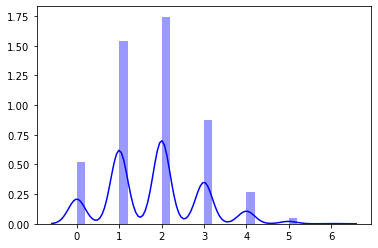

In [14]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

binomial_data = binom.rvs(n = n, p = P, size = 1000)
sns.distplot(binomial_data, hist = True, kde = True, color = "blue")

- Probability of getting faulty out of 6 trials

In [15]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

prob = binom.pmf(k, n, P)  
print("Probability :",round(prob,4 ))
cdf = binom.cdf(k = k, n = n, p = P)      # Cumulative distribution function
print("CDF         :",round(cdf, 4))

Probability : 0.3241
CDF         : 0.7443


#### Calculate mean and standard deviation;
    - mean = np  
    - Standard Deviation = sqrt(npq)

In [20]:
from scipy.stats import binom 
import math 

mean, var = binom.stats(n, P) 

print("mean           = ",str(mean)) 
print("variance       = ",str(var))
print("Std. Deviation = ",math.sqrt(var))

mean           =  1.7999999999999998
variance       =  1.2599999999999998
Std. Deviation =  1.1224972160321822


# ***Problem Statement 6:***

- Gaurav and Barakha are both preparing for entrance exams. Gaurav attempts to solve 8 questions per day with a correction rate of 75%, while Barakha averages around 12 questions per day with a correction rate of 45%. 
- **What is the probability that each of them will solve 5 questions correctly? What happens in cases of 4 and 6 correct solutions? What do you infer from it? What are the two main governing factors affecting their ability to solve questions correctly? Give a pictorial representation of the same to validate your answer.**

#### **`Solution :- `**

In [21]:
from scipy.stats import binom
import numpy as np

que_5 = binom.pmf(5,8,0.75)*binom.pmf(5,12,0.45)
que_4_6 = binom.pmf(4,8,0.75)*binom.pmf(6,12,0.45)
print("Prob. of each of them solving 5 que. correctly   :",round(que_5, 2))
print("Prob. of each of them solving 4,6 que. correctly :",round(que_4_6, 2))


Prob. of each of them solving 5 que. correctly   : 0.05
Prob. of each of them solving 4,6 que. correctly : 0.02


**Following graphs show their correction rates individually and combined**

In [22]:
def binom_plot(n,p,):
    fig,ax = plt.subplots(1,1)
    x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
    ax.plot(x, binom.pmf(x, n, p), 'bo', ms = 8, label='binom pmf')
    ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

- `for Gaurav`

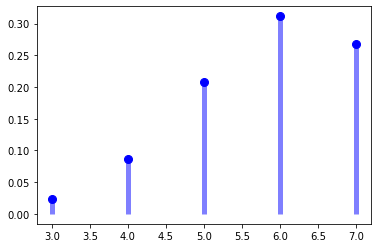

In [23]:
#Gaurav
binom_plot(8, 0.75)

- `for Barakha`

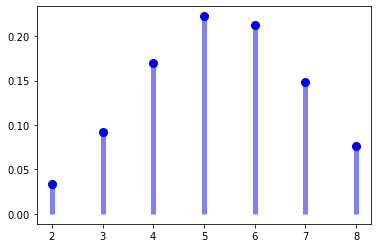

In [24]:
binom_plot(12, 0.45)

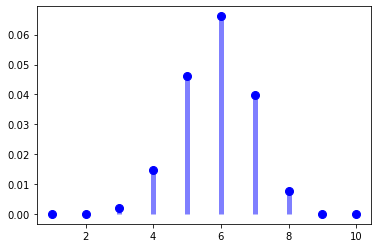

In [25]:
fig,ax=plt.subplots(1,1)
x = np.arange(1,11)
ax.plot(x, binom.pmf(x,8,0.75)*binom.pmf(x,12,0.45), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x,8,0.75)*binom.pmf(x,12,0.45), colors='b', lw=5, alpha=0.5)
plt.show()
# maximum combined probability observed at 6 question

In [26]:
from scipy.stats import binom
binom.pmf(5, 8, 0.75)*binom.pmf(5, 12, 0.45)

0.04619989057299213

# ***Problem Statement 7:***

- Customers arrive at a rate of 72 per hour to my shop. What is the probability of k customers arriving in 4 minutes?
   - a) 5 customers, 
   - b) not more than 3 customers, 
   - c) more than 3 customers. 
- **Give a pictorial representation of the same to validate your answer.**

#### **`Solution :- `**

In [27]:
from scipy.stats import poisson

- We need to calculate average number of customers arriving per 4 minutes
- 72/60 customers come per minute

In [28]:
mu = 4 * (72 / 60) #customers come per 4 minutes

- **(a):** The probability of arriving 5 cutomers in 4 minutes is 

In [29]:
ans1 = poisson.pmf(k = 5, mu = mu)
print("Answer: ", round(ans1, 3))

Answer:  0.175


- **(b):** The probability of arriving not more than 3 customers in 4 minutes is


In [30]:
ans2 = poisson.pmf(k = 3, mu = mu)
print("Answer: ", round(ans2, 3))

Answer:  0.152


- **(c):** The Probability of more than 3 customers arriving in 4 minutes is 

In [31]:
ans3 = 1-poisson.cdf(k = 3, mu = mu)
print("Answer: ", round(ans3, 3))

Answer:  0.706


In [32]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Probability')

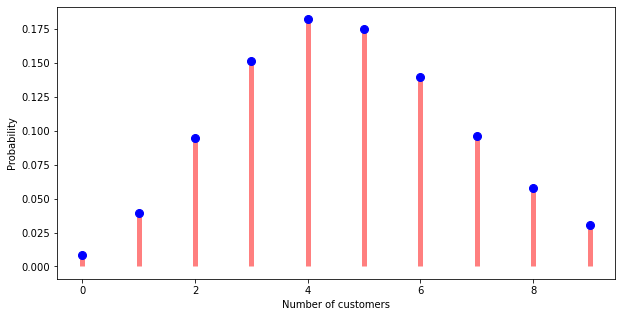

In [33]:
x = list(range(0, 10))
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.plot(x, poisson.pmf(x,mu), 'bo', ms = 8, label = 'poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors ='r', lw = 5, alpha = 0.5)
plt.xlabel('Number of customers')
plt.ylabel('Probability')

# ***Problem Statement 8***

- I work as a data analyst in Aeon Learning Pvt. Ltd. After analyzing data, I make reports, where I have the efficiency of entering 77 words per minute with 6 errors per hour.
  - What is the probability that I will commit 2 errors in a 455-word financial report?
  - What happens when the no. of words increases/decreases (in case of 1000 words, 255 words)?
  - How is the λ affected?
  - How does it influence the PMF?
- **Give a pictorial representation of the same to validate your answer.**

#### **`Solution :- `**


  - Rate of entering = 77 per minute
  - error rate = 6/hour = 0.1 per minute
  - No of errors per word = 0.1 / 77

In [34]:
from scipy.stats import poisson

unit_mu=0.1 / 77
def mu(n):
    return n * unit_mu                                                                        

In [35]:
word_455 = poisson.pmf(2, mu = mu(455))
word_1000 = poisson.pmf(2, mu = mu(1000))
word_255 = poisson.pmf(2, mu = mu(255))

print("The pob. of commiting 2 errors in 455 words financial report is  :",round(word_455, 2))
print("The pob. of commiting 2 errors in 1000 words financial report is :",round(word_1000, 2))
print("The pob. of commiting 2 errors in 255 words financial report is  :",round(word_255, 2))
x = range(100, 1000, 50)
mu = [i * unit_mu for i in x]

The pob. of commiting 2 errors in 455 words financial report is  : 0.1
The pob. of commiting 2 errors in 1000 words financial report is : 0.23
The pob. of commiting 2 errors in 255 words financial report is  : 0.04


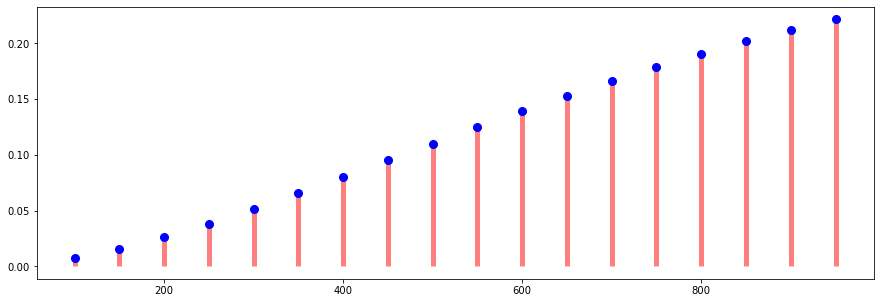

In [36]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,poisson.pmf(2,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0, poisson.pmf(2,mu), colors='r', lw=5, alpha=0.5)
plt.show()


**As the number of words increase probability of getting errors increases**

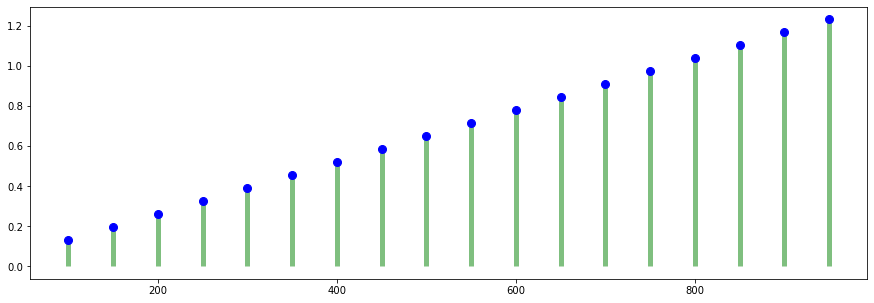

In [37]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,mu, 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0,mu, colors='g', lw=5, alpha=0.5)
plt.show()

**Value of mu keeps on increasing with number of words**

# ***Problem Statement 9:***

- Let the continuous random variable D denote the diameter of the hole drilled in an aluminum sheet. The target diameter to be achieved is 12.5mm. Random disturbances in the process often result in inaccuracy. Historical data shows that the distribution of D can be modelled by the PDF, `f(d) = 20e−20(d−12.5)`, `d ≥ 12.5.` If a part with `diameter > 12.6 mm` needs to be scrapped,
- **what is the proportion of those parts? What is the CDF when the diameter is of 11 mm? What is the conclusion of this experiment?**

#### **`Solution :- `**

- **Given**:
     - f(d) = 20e−20(d − 12.5)
     - d ≥ 12.5

In [38]:

PDF = lambda d:20*(np.exp((-20*(d - 12.5))))
x = 12.6
P_x = integrate.quad(PDF, 12.6, np.inf)
y = 11
CDF = integrate.quad(PDF, -np.inf, y)
print("Proportion of Parts need to scrapped when d > 12.6mm is : ")
print(round(P_x[0], 4))


Proportion of Parts need to scrapped when d > 12.6mm is : 
0.1353


<ipython-input-38-a6a931d81bb3>:1: RuntimeWarning: overflow encountered in exp
  PDF = lambda d:20*(np.exp((-20*(d - 12.5))))


In [39]:
print("CDF when d = 11 mm is                 : ", CDF[0])
print("Proportion of CDF when d > 12.5 mm is :", integrate.quad(PDF,12.5,np.inf)[0])

CDF when d = 11 mm is                 :  inf
Proportion of CDF when d > 12.5 mm is : 1.0000000000000024


- **Conclusion**
  - It can be concluded that the function is only valid when 
    - `d >= 12.5` 
  - When d < 12.5, 
    - The part can be reworked to 12.5 so `no scrap` in this case.
  - PDF is not defined for d = 11

# ***Problem Statement 10:***

- Please compute the following:
  - a) P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)
  - b) Find the value z such that P(Z > z) = 0.05
  - c) Find the value of z such that P(−z < Z < z) = 0.99

#### **`Solution :- `**

In [40]:
from scipy.stats import norm
def P(z,b=-np.inf) :
    return integrate.quad(norm.pdf,b,z)[0]

- **a.1)** 
   - `P(Z > 1.26)` ?

In [41]:
print('P(Z > 1.26) = ', round((1-P(1.26)), 4))

P(Z > 1.26) =  0.1038


- **a.2)**
   - `P(Z < −0.86)` ?

In [42]:
print('P(Z < -0.86) = ',round(P(-0.86), 4))

P(Z < -0.86) =  0.1949


- **a.3)**
   - `P(Z > −1.37)` ?

In [43]:
print('P(Z > -1.37) = ', round((1-P(-1.37)), 4))

P(Z > -1.37) =  0.9147


- **a.4)**
   - `P(−1.25 < Z < 0.37)` ?

In [44]:
print('P(−1.25 < Z < 0.37) = ',round(P(0.37,b=-1.25), 4))

P(−1.25 < Z < 0.37) =  0.5387


- **a.5)**
   - `P(Z ≤ −4.6)` ?

In [45]:
print('P(Z ≤ −4.6) = ',round(P(-4.6), 4))

P(Z ≤ −4.6) =  0.0


**b) Find the value z such that `P(Z > z) = 0.05`**

In [46]:
print('P(Z > z) = 0.05 is ', round((-1*norm.ppf(0.05)), 4))

P(Z > z) = 0.05 is  1.6449


**c) Find the value of z such that `P(−z < Z < z) = 0.99`**

In [47]:
print('𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is ',round((abs(norm.ppf(0.005))), 4))

𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is  2.5758


# ***Problem Statement 11:***

- The current flow in a copper wire follow a normal distribution with a mean of 10 mA and a variance of 4 (mA)2.
  - What is the probability that a current measurement will exceed 13 mA? 
  - What is the probability that a current measurement is between 9 and 11mA? 
- **Determine the current measurement which has a probability of 0.98.**

#### **`Solution :- `**

In [48]:
from scipy import integrate
from scipy.stats import norm

mean = 10
std = np.sqrt(4)

def calcula(z, b = -np.inf):
    z = (z - mean) / std
    return integrate.quad(norm.pdf, b, z)[0]

**The probability that a current measurement will exceed 13 mA is :**

In [49]:
round(1-calcula(13), 4)

0.0668

**The probability that a current measurement is between 9 and 11mA**

In [50]:
round(1 - calcula(11, b = 9), 4)

1.3085

# ***Problem Statement 12:***

- The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch and a standard deviation of 0.0005 inch. The specifications of the shaft are 0.2500 ∓ 0.0015 inch. 
  - What proportion of shafts are in sync with the specifications? 
  - If the process is centered so that the mean is equal to the target value of 0.2500, what proportion of shafts conform to the new specifications? 
- **What is your conclusion from this experiment?**

#### **`Solution :- `**

In [51]:
mean = 0.2508
std = 0.0005

def calcu(mean, std, a, b) :
    a = (a - mean) / std
    b = (b - mean) / std
    print(round(b, 4))

**Proportion of shafts with dia in range of`0.2485 < d < 0.2515` when mean diameter :**

In [52]:
0.2508, calcu(0.2508, 0.0005, 0.2485, 0.2515)

1.4


(0.2508, None)

**Proportion of shafts with dia in range of `0.2485 < d < 0.2515` when mean diameter :**

In [53]:
0.2500, calcu(0.2500, 0.0005, 0.2485, 0.2515)

3.0


(0.25, None)

- Within the range of `0.2485 < d < 0.2515` A manufacturing process with **mean of 0.25** gives **maximum proportion of required shafts**, there by reducing amount of scrap and reprocessing time.

- When compared to any other manufacturing process whose mean deviates from that of 0.25 less proportion of required shafts are obtained. The more the manufucaturing process deviaties from 0.25, lesser will be the proportion of reqired safts obtained.

- Mathematically, 
   - In a given range `0.2485 < d < 0.2515` , 
   - if there are two noraml distributrions (manufacturing processes) with `same standard deviation`, **more area will be covered by the distribution whose mean is closer to mean of the interval i.e 0.25**

- **OR**

- `P(0.2485 < d < 0.2515)` = `P( 0.2485 – 0.2508 < Z < 0.2515 – 0.2508)` ~ **0.92**
     - Where,  
        - 0.2485 – 0.2508 = 0.0005 
        - 0.2515 – 0.2508 = 0.0005
- About 92% of diameters conforms to specificationsWhat 
   - `The target` : **0.2500**
   - `The process mean` : **0.2508**
   - The specification limits : 
      - `LSL` : **0.2485**
      - `USL` : **0.2515**
- The process centered : 
   - (process mean = target) 
- The proportion of shafts that conforms to specification if the process iscentered :
   - `P(0.2485 < d < 0.2515)` = `P( 0.2485 –0.2500 < Z < 0.2515 – 0.2500)` = 0.9973
     - where, 
       - 0.2485 – 0.2500 = 0.0005
       - 0.2515 – 0.2500 = 0.0005
- It would be increased from `92%` to `99.73%`
